# Assignment Two

CivE 6388 - Advanced Hydrology

Brandon Whittle

September 25, 2023

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve

## Problem One

Given the following probability mass function: $p_x(x)=\alpha x, x=1,2,3,...,9$ determine the value of $\alpha$ that results in a legitimate mass function. Graph both the probability mass and cumulative distribution fuinctions. Use your programming skill and show how you calculate CDF.

To determine the value of $\alpha$ for this discrete mass function, we must solve: 

$$
\begin{align}
    \Sigma_{i=1}^{9} \alpha x &= 1 \nonumber \\
    \alpha \cdot [1+2+3+\cdots+9] &= 1 \nonumber \\
    \alpha \cdot 45 &= 1 \nonumber \\
    \alpha &= \frac{1}{45} \nonumber
\end{align}
$$

Next, to determine the CMF, we do a cumulative summation along the length of the array of values, such that:

$$
\begin{equation}
    F_x(x_i) = \Sigma_{j=1}^{i} \frac{x_j}{45} \nonumber
\end{equation}
$$

where $i$ varies between 1-9 discretely according to our dataset. In a continuous distribution, this would simply be the integral of the PDF.

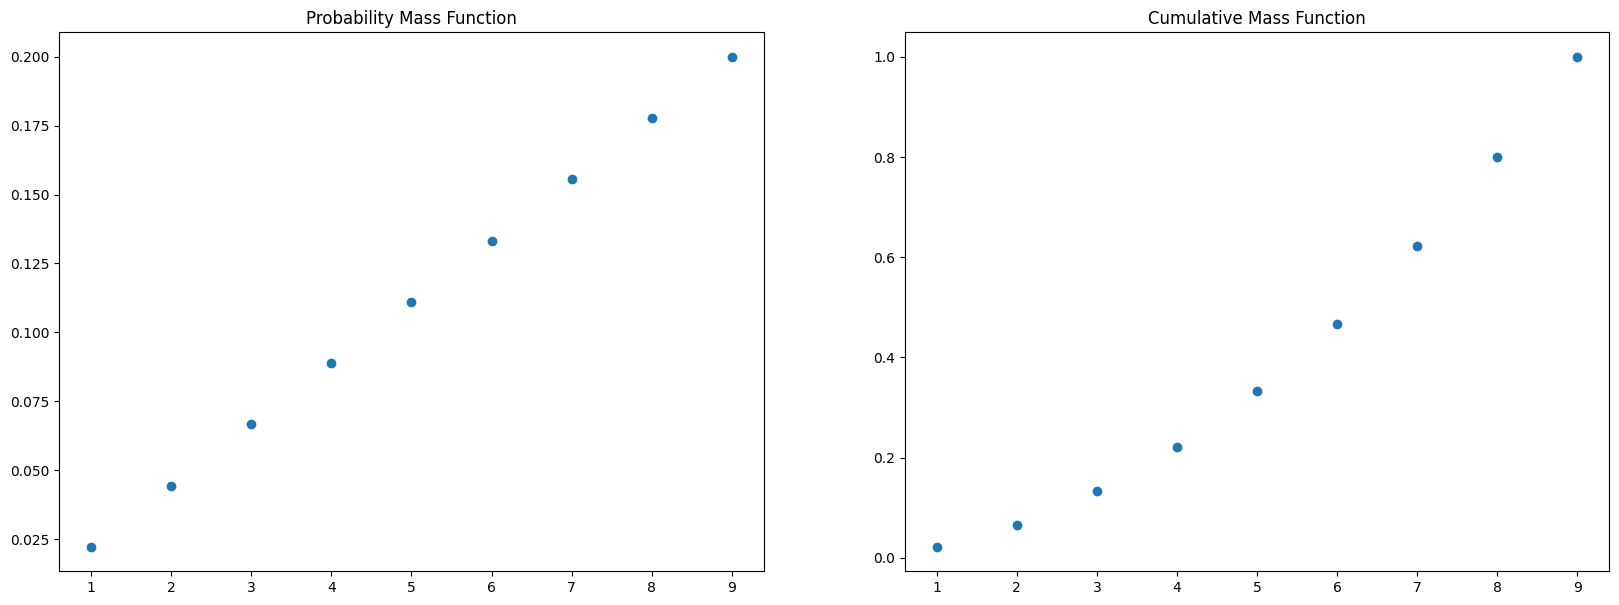

In [96]:
fig, ax = plt.subplots(1,2,figsize=(20,7))

# Calculate alpha
alpha = 1/np.sum(np.linspace(1,9,9))
p01_x = np.linspace(1, 9, 9) # Create discrete x mappings
p01_masses = [x*alpha for x in p01_x] # Generate mass values based on alpha
p01_cumulative = [np.sum(p01_x[0:int(x)]*alpha) for x in p01_x] # Generate cumulative stops along x value list

# Graph stuff
ax[0].scatter(p01_x, p01_masses)
ax[0].set(title="Probability Mass Function")
ax[1].scatter(p01_x, p01_cumulative)
ax[1].set(title="Cumulative Mass Function")
plt.show()

## Problem Two

Solve the problem 3-32 (page 111) in the textbook. Use your programming skill and show how you solve the problem.

(3-32) For the following probabilty mass function:

| x | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
|---|---|---|---|---|---|---|---|
|$P_x(x)$| 0.05 | 0.05 | 0.25 | 0.2 | 0.2 | 0.15 | 0.1 |

*(a) Compute the expected value of $X$*

To compute the expected value, or mean, we need to multiply the value of the random variable by it's probability. This leads to the following:

$$
\begin{align}
    \bar{X} &= \Sigma_{i=1}^{7} x_i \cdot P_x(x_i) \nonumber \\
        &= [0 \cdot 0.05] + [1 \cdot 0.05] + [2 \cdot 0.25] + \cdots + [6 \cdot 0.1] \nonumber \\
        &= \boxed{3.3} \nonumber
\end{align}
$$

*(b) Compute the variance and standard deviation*

The variance of a sample is expressed by:

$$
\begin{equation}
    s^2 = \Sigma_{i=1}^{n} (x_i-m)^2P_x(x_i) \nonumber
\end{equation}
$$

and the standard deviation is the root of the variance. This is calculated in the code below.

*(c) Compute the probability that $X\geq4$*

The probability that $X\geq4$ is simply:
$$
\begin{align}
    P(X\geq4) &= \Sigma_{i=4}^6 P_x(x_i) \nonumber \\
              &= 0.2 + 0.15 + 0.1 \nonumber \\
              &= \boxed{0.45} \nonumber
\end{align}
$$

In [75]:
p02_x = np.linspace(0,6,7) # Generate discrete x mappings
p02_masses = [0.05, 0.05, 0.25, 0.2, 0.2, 0.15, 0.1] # Input weights from problem

p02_mean = round(np.sum([x*p02_masses[int(x)] for x in p02_x]),2) # Calculate mean
p02_variance = round(np.sum([np.power(x-p02_mean,2)*p02_masses[int(x)] for x in p02_x]),2) # Calculate variance
p02_stdd = round(np.sqrt(p02_variance),2) # Calculate standard deviation

print(f"Mean: \t\t\t{p02_mean}")
print(f"Variance: \t\t{p02_variance}")
print(f"Standard Deviation: \t{p02_stdd}")

Mean: 			3.3
Variance: 		2.51
Standard Deviation: 	1.58


## Problem Three

Solve the problem 3-41 (page 112) in the textbook. Draw the probability desity and cumulative distribution functions using your programming skill.

(3-41) Find the value of $k$ that is necessary to make the following a legitimate density function:

$$
\begin{equation}
    f_x(x) =
    \left\{ 
        \begin{array}{lr}
            2\text{exp}(-kx), & \text{for } 0 \leq x\leq \infty \\
            0, & \text{elsewhere}
        \end{array}
    \right\} \nonumber
\end{equation}
$$

To solve for $k$, we will equate the integral of $f_x(x)$ to $1$ and solve. Once we have this value of $k$, we will integrate the PDF to get the CDF. 

Once we determine that $k$ is $2$ (see code below), we solve for the CDF as follows:

$$
\begin{align}
    F_x(x) &= \int 2 \cdot e^{-2 \cdot x} dx \nonumber \\
           &= \frac{2}{-2} \cdot e^{-2 \cdot x} + C \nonumber \\
           &= -e^{-2 \cdot x} + C \nonumber
\end{align}
$$

And knowing that the cumulative at $0$ must be $0$, 

$$
\begin{align}
    F_x(0) &= -e^{-2 \cdot x} + C = 0 \nonumber \\
           &= -e^{-2 \cdot (0)} + C = 0 \nonumber \\
           &= -e^0 + C = 0 \nonumber \\
           C &= 1 \nonumber \\
    F_x(x) &= -e^{-2 \cdot x} + 1 \nonumber
\end{align}
$$

k: 2.0


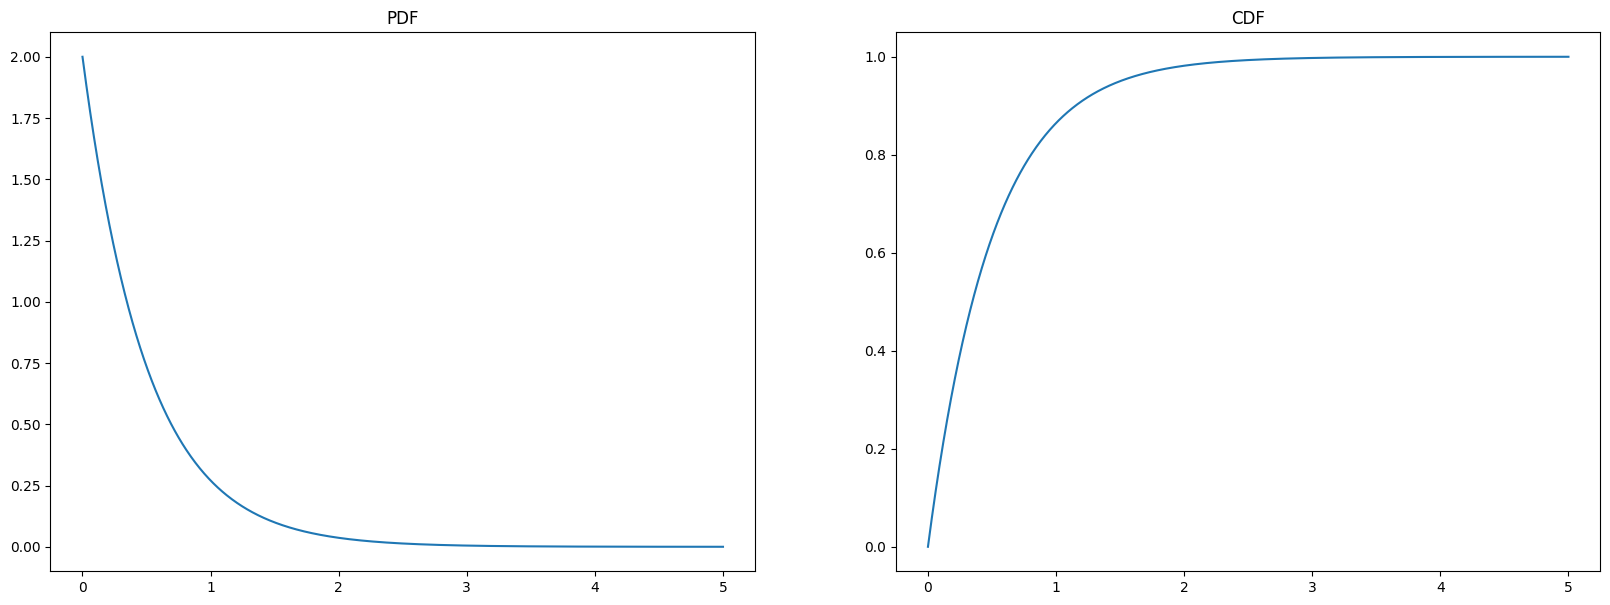

In [76]:
def p03_f_x(x, k):
    '''
    The density function as defined by the problem
    '''
    return 2*np.exp(-k*x)

def p03_F_x(x, k):
    '''
    The CDF of the density function provided in the problem
    '''
    return -np.exp(-k*x) + 1
    
# Solve for k
p03_k = round(fsolve(lambda k: quad(lambda x, k: p03_f_x(x, k), 0, np.inf, args=(k))[0] -1, 1)[0], 2)
print(f'k: {p03_k}')

# Graph stuff
p03_x = np.linspace(0, 5, 1000)
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].plot(p03_x, p03_f_x(p03_x, p03_k))
ax[0].set(title='PDF')
ax[1].plot(p03_x, p03_F_x(p03_x, p03_k))
ax[1].set(title='CDF')
plt.show()


## Problem Four

Solve the problem 3-43 (page 112). In addition, determine the mean, variance, standard deviation, coefficient of variation, and skewness. Use your programming skill, as necessary, to draw the probability density and cumulative distribution functions or to calculate the moments and statistics.

(3-43) The duration of a construction activity was estimated to be in the range [2, 6] days with a most likely duration of 4 days. A construction engineer used the following symmetric density function to model the duration:

$$
\begin{equation}
    f_x(x) = 
    \left\{
        \begin{array}{lr}
            bx, & \text{for } 2 \leq x \leq 4 \\
            a - bx, & \text{for } 4 \leq x \leq 6
        \end{array}
    \right\}
\end{equation}
$$

Determine the necessary constants $a$ and $b$ to have a legitimate density function. Graph both the density and cumulative functions. 

To determine the values of $a$ and $b$, we first recognize that because it is a symmetrical function, the area under $bx$ from $2 \leq x \leq 4$ must include half the total area, and the same can be said for the region under $a-bx$ from $4 \leq x \leq 6$.

First, we solve for b (also shown in the code below):

$$
\begin{align}
    \int_2^4 bx dx &= 0.5 \nonumber \\
    \left[ \frac{bx^2}{2}\right]_2^4 + C &= 0.5 \nonumber \\
    \left[ \frac{16-4}{2} \right]b + C &= 0.5 \nonumber \\
    6b + C &= 0.5 \nonumber \\
\end{align}
$$

This leaves us with two variables, but because $bx$ must be rooted at $x=0$ and has no vertical modifier, we know that $C=0$. Continuing:

$$
\begin{align}
    6b &= 0.5 \nonumber \\
    b &= \frac{1}{12} \nonumber \\
\end{align}
$$

Now we can work through a similar process for $a$:

$$
\begin{align}
    \int_4^6 a-bx dx &= 0.5 \nonumber \\
    \left[ ax - \frac{bx^2}{2} \right]_4^6 + C &= 0.5 \nonumber \\
    2a - \frac{1}{12} \cdot \frac{20}{2} + C &= 0.5 \nonumber \\
\end{align}
$$

Once again, because this is a reflection of $bx$ which was originally rooted on $x=0$, and because there is no additional movement, $C=0$. Continuing:

$$
\begin{align}
    2a - \frac{1}{12} \cdot \frac{20}{2} + C &= 0.5 \nonumber \\
    2a - \frac{5}{6} &= 0.5 \nonumber \\
    2a &= \frac{4}{3} \nonumber \\
    a &= \frac{2}{3} \nonumber \\
\end{align}
$$

The code below will verify that the CDF for this piecewise funtion approaches 1 on the interval specified.

To obtain the functions for the CDF that will appear continuous and add to 1, the $C$ values of the integration must be selected. This is done as follows:

$$
\begin{align}
    \int \frac{1}{12}x dx & \nonumber \\
    \frac{1}{12} \frac{1}{2} x^2 + C_1 \nonumber \\
    \frac{1}{24} (2)^2 + C_1 &= 0  \nonumber \\
    \frac{1}{24} \cdot 4 + C_1 &= 0 \nonumber \\
    C_1 &= -\frac{1}{6} \nonumber \\
\end{align}
$$

and 

$$
\begin{align}
    \int \frac{2}{3} - \frac{1}{12}x dx & \nonumber \\
    \frac{2}{3}x - \frac{1}{12} \frac{1}{2} x^2 + C_2 \nonumber \\
    \frac{2}{3} (4) - \frac{1}{24} (4)^2 + C_2 &= 0.5  \nonumber \\
    \frac{8}{3} - \frac{1}{24} \cdot 16 + C_2 &= 0.5 \nonumber \\
    \frac{8}{3} - \frac{2}{3} + C_2 &= 0.5 \nonumber \\
    2 + C_2 &= 0.5 \nonumber \\
    C_2 &= -\frac{3}{2} \nonumber \\
\end{align}
$$

Sum of area under curve: 1.0
Mean: 4.0
Variance: 1.11
Standard Deviation: 1.05


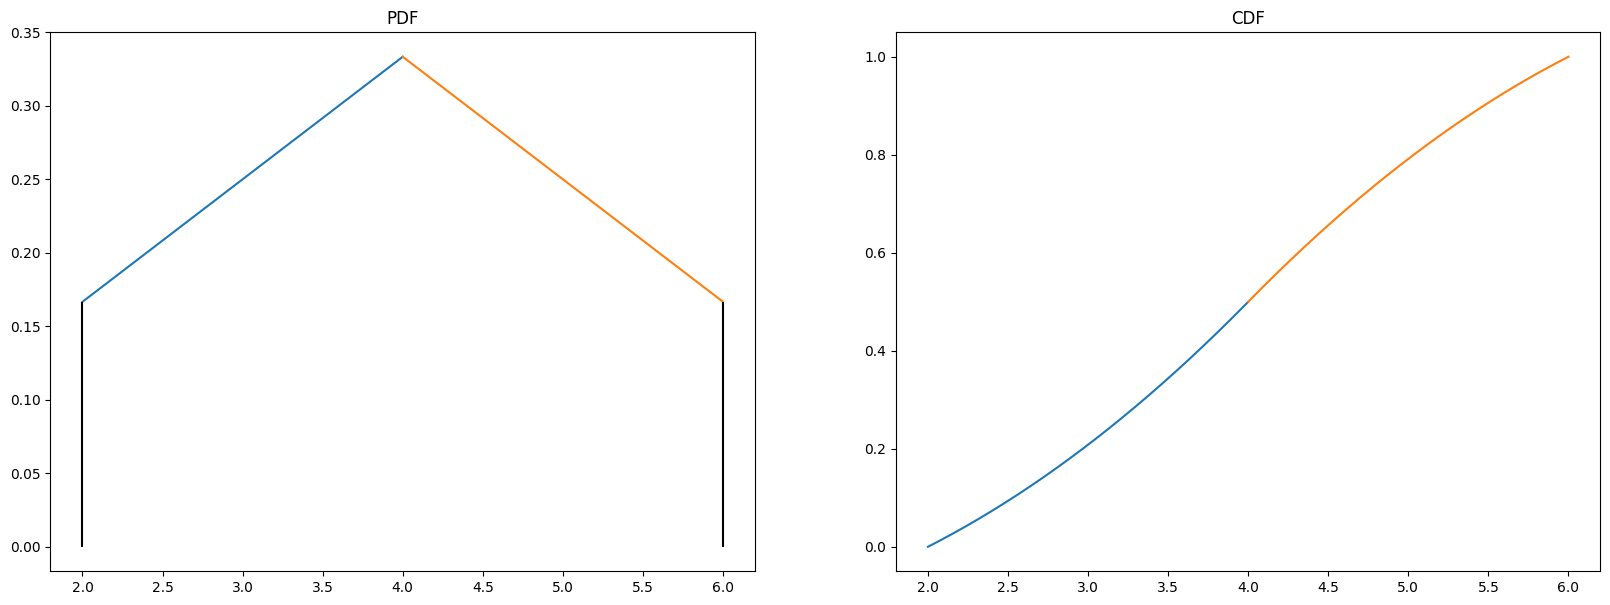

In [132]:
# Solve for b
p04_b = fsolve(lambda b: quad(lambda x, b: b*x, 2, 4, args=(b))[0] - 0.5, 1)[0]

# Solve for a
p04_a = fsolve(lambda a: quad(lambda x, a: a - p04_b*x, 4, 6, args=(a))[0] - 0.5, 1)[0]

# Verify sum of area under both curves is 1
p04_sum = quad(lambda x: 1/12*x, 2, 4)[0] + quad(lambda x: 2/3 - 1/12*x, 4, 6)[0]
print(f'Sum of area under curve: {p04_sum}')

p04_x_1 = np.linspace(2, 4, 1000000) # Generate incredibly discrete x mappings to serve as continuous x values
p04_x_2 = np.linspace(4, 6, 1000000) # Generate incredibly discrete x mappings to serve as continuous x values

# Calculate mean
p04_mean = quad(lambda x: x*p04_b*x, 2, 4)[0] + quad(lambda x: x * (p04_a - p04_b*x), 4, 6)[0]
print(f'Mean: {p04_mean}')

# Calculate variance
p04_variance = quad(lambda x: np.power(x - p04_mean, 2)*p04_b*x, 2, 4)[0] + quad(lambda x: np.power(x - p04_mean, 2) * (p04_a - p04_b*x), 4, 6)[0]
print(f'Variance: {p04_variance:.2f}')

# Calculate standard deviation
p04_stdd = np.sqrt(p04_variance)
print(f'Standard Deviation: {p04_stdd:.2f}')

# Graph stuff
fix, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].plot(p04_x_1, p04_b*p04_x_1)
ax[0].plot(p04_x_2, p04_a - p04_b*p04_x_2)
ax[0].vlines([2, 6], ymin=0, ymax=1/6, color='k')
ax[0].set(title='PDF')

ax[1].plot(p04_x_1, p04_b*np.power(p04_x_1, 2)/2-1/6)
ax[1].plot(p04_x_2, p04_a*p04_x_2 - p04_b*np.power(p04_x_2, 2)/2-1.5)
ax[1].set(title="CDF")

plt.show()

## Problem Five

Solve the problem 6-1 (page 221).

(6-1) A shipping company records the conditions of cargoes at the delivery points as not damaged (ND), damaged (D), and partially damaged (PD). The following probability mass function was established for three shipping methods:

|   | ND | D | PD |
|---|---|---|---|
| Sea | 0.20 | 0.04 | 0.02 |
| Air | 0.40 | 0.02 | 0.03 |
| Ground | 0.27 | 0.01 | 0.01 |

Determine the marginal probability mass functions $P_X(x)$ and $P_Y(y)$. If a cargo is damaged, what is the probability that it was shipped by sea? By air? By ground? Are the random variables statistically uncorrelated? Why?

The marginal probability mass functions are as follows:

$$
\begin{align}
    p_{X_1}(x_1) &= \Sigma_{all X_2} P_{X_1,X_2}(x_1,x_2) \nonumber \\
    p_{X_1}(ND) &= 0.20 + 0.40 + 0.27 = 0.87 \nonumber \\
    p_{X_1}(D) &= 0.04 + 0.02 + 0.01 = 0.07 \nonumber \\
    p_{X_1}(PD) &= 0.02 + 0.03 + 0.01 = 0.06 \nonumber \\
\end{align}
$$

and for the second variable:

$$
\begin{align}
    p_{X_2}(x_2) &= \Sigma_{all X_2} P_{X_1,X_2}(x_1,x_2) \nonumber \\
    p_{X_2}(Sea) &= 0.20 + 0.04 + 0.02 = 0.26 \nonumber \\
    p_{X_2}(Air) &= 0.40 + 0.02 + 0.03 = 0.45 \nonumber \\
    p_{X_2}(Ground) &= 0.27 + 0.01 + 0.01 = 0.29 \nonumber \\
\end{align}
$$

To determine if the probability that damaged cargo was shipped by any one of the three shipping methods, we will use conditional PMF as follows:

$$
\begin{align}
    p_{X_1,X_2}(x_1|x_2) &= \frac{p{X_1,X_2}(x_1,x_2=D)}{p_{X_2}(x_2=D)} \nonumber \\
    p_{X_1,X_2}(Sea|Damaged) &= \frac{0.04}{0.07} \nonumber \\
    p_{X_1,X_2}(Air|Damaged) &= \frac{0.02}{0.07} \nonumber \\
    p_{X_1,X_2}(Ground|Damaged) &= \frac{0.01}{0.07} \nonumber \\

\end{align}
$$

To determine correlation, we will check for equality between $p_{X_1,X_2}(x_1,x_2)$ and the product $p_{X_1}(x_1)p_{X_2}(x_2)$ as follows:

$$
\begin{align}
    p_{X_1,X_2}(x_1,x_2) &= p_{X_1}(x_1)p_{X_2}(x_2) \nonumber \\
    p_{X_1,X_2}(Sea, Damaged) &= p_{X_1}(Sea)p_{X_2}(Damaged) \nonumber \\
    0.04 &\not\approx 0.26 \cdot 0.07 = 0.0182 \nonumber \\
    p_{X_1,X_2}(Air, Damaged) &= p_{X_1}(Sea)p_{X_2}(Damaged) \nonumber \\
    0.02 &\not\approx 0.45 \cdot 0.07 = 0.0315 \nonumber \\
    p_{X_1,X_2}(Ground, Damaged) &= p_{X_1}(Sea)p_{X_2}(Damaged) \nonumber \\
    0.01 &\not\approx 0.29 \cdot 0.07 = 0.0203 \nonumber \\
\end{align}
$$

Because these values are not approximately the same, we can conclude that the variables are not statistically correlated.

## Problem Six

Solve the problem 6-9 (page 222).

(6-9) The following is a joint probability density function for two continuous random variables, $X$, and $Y$:

$$
\begin{equation}
    f_{XY}(x,y)=cxy \text{ for } 0 < x < 1 \text{ and } 0 < y < 1 \nonumber 
\end{equation}
$$

Determine the constant $c$ such that $F_{XY}(x,y)$ is a legitimate joint density function. Evaluate the marginal density functions $f_X(x)$ and $f_Y(y)$. Evaluate the probability that $0<x<0.5$ and $0<y<0.25$. Are the random variables statistically uncorrelated? Why?

To determine the value of $c$ for this jpdf, we will equate the integral of the defined area to one and solve for $c$ as follows:

$$
\begin{align}
    \int_0^1 \int_0^1 cxy\,dx\,dy &= 1 \nonumber \\
    \int_0^1 \left[ \frac{1}{2}cx^2y \right]_0^1\,dy &= 1 \nonumber \\
    \int_0^1 \frac{1}{2}cy\,dy &= 1 \nonumber \\
    \left[ \frac{1}{4}cy^2 \right]_0^1 &= 1 \nonumber \\
    \frac{c}{4} &= 1 \nonumber \\
    c &= 4 \nonumber \\
    \therefore f_{XY}(x,y) &= \left\{
        \begin{array}{lr}
            4xy, &0<x<1 \text{ and } 0<y<1 \nonumber \\
            0, & elsewhere
        \end{array}
    \right\}
\end{align}
$$

The joint pdf is 0 everywhere x and y are out of the range 0-1.

The marginal distributions are then evaluated as the single integrals:

$$
\begin{align}
    f_X(x) &= \int_0^1 cxy\,dy \nonumber \\
           &= 2x \nonumber \\
    f_Y(y) &= \int_0^1 cxy\,dx \nonumber \\
           &= 2y \nonumber 
\end{align}
$$

To evaluate the probability that $0<x<0.5$ and $0<y<0.25$, we will evaluate the double integral pdf:

$$
\begin{align}
    P(0<x<0.5 \cap 0<y<0.25) &= \int_0^{0.25} \int_0^{0.5} 4xy\,dx\,dy\nonumber \\
                            &= \int_0^{0.25} \left[ 4x^2y \right]_0^{0.5} \nonumber \\
                            &= \int_0^{0.25} y \nonumber \\
                            &= \left[ \frac{1}{2}y^2 \right]_0^{0.25} \nonumber \\
                            &= \frac{1}{32} \nonumber
\end{align}
$$

To determine if they are independent, we will evaluate the following:

$$
\begin{align}
    f_{X,Y}(x,y) &= f_X(x)f_Y(y) \nonumber \\
    4xy &= 2x \cdot 2y \nonumber \\
    4xy &= 4xy \nonumber 
\end{align}
$$

Because the functions evaluates equally, they are independent. 

## Problem Seven

Two adjoining regions are subject to earthquakes at irregular intervals. The first region experiences $X_1$ earthquakes over a period of time, and $X_2$ earthquakes occur in the second region over the same period, where $X_1$ and $X_2$ are random variables. It is estimated that the joint distribution of earthquakes over the two regions is as follows:

$$
\begin{align}
    p_{X_1,X_2}(x_1,x_2) = 
    \left\{
        \begin{array}{lr}
            \frac{x_1+x_2}{21}, & \text{ for }x_1 = 0,1,2 \text{ and } x_2 = 2,3 \nonumber \\
            0, & \text{ elsewhere}
        \end{array}
    \right\}
\end{align}
$$

Determine the probabilities $p_{X_1|X_2}(x_1|x_2)$ and expected values $E[X_1|X_2]$.

A table of the joint PMF is below (top row is X, markdown doesn't like complex tables):

|X/Y| 0 | 1 | 2 |
|---|---|---|---|
| 2 | 2/21 | 3/21 | 4/21 |
| 3 | 3/21 | 4/21 | 5/21 |

Using this table, we can then evaluate the conditional probabilities as follows:

$$
\begin{align}
    p_{X|Y}(x|y) &= \frac{p_{X|Y}(x,y)}{p_Y(y)} \nonumber \\
    p_{X|Y}(0,2) &= \frac{\frac{2}{21}}{\frac{9}{21}} \nonumber \\
    p_{X|Y}(1,2) &= \frac{\frac{3}{21}}{\frac{9}{21}} \nonumber \\
    p_{X|Y}(2,2) &= \frac{\frac{4}{21}}{\frac{9}{21}} \nonumber \\
    p_{X|Y}(0,3) &= \frac{\frac{3}{21}}{\frac{12}{21}} \nonumber \\
    p_{X|Y}(1,3) &= \frac{\frac{4}{21}}{\frac{12}{21}} \nonumber \\
    p_{X|Y}(2,3) &= \frac{\frac{5}{21}}{\frac{12}{21}} \nonumber \\
\end{align}
$$

## Problem Eight

Two sewage plants serving different communities discharge a pollutant into a stream. The concentrations of the respective discharges are measured as $X$ and $Y$ parts per million. Suppose the bivariate distribution is given by

$$
\begin{equation}
    f_{X,Y}(x,y) = 
    \left\{  
        \begin{array}{lr}
            2-x-y, & \text{ for } 0\leq X, Y\leq 1 \nonumber \\
            0, & \text{ elsewhere} \nonumber
        \end{array}
    \right\}
\end{equation}
$$

a) Determine the joint probability $Pr[X<0.5, Y<0.6]$.

b) If $X \leq 0.5$, determine the distribution of $Y$.

c) Determine the correlation between $X$ and $Y$.

The joint probability is given by:

$$
\begin{align}
    P[0 \leq X < 0.5 \cap 0 \leq Y < 0.6] &= \int_0^{0.5} \int_0^{0.6} 2-x-y\,dy\,dx \nonumber \\
            &= \int_0^{0.5} \left[(2-x) \cdot y - \frac{y^2}{2}\right]_0^{0.6}\,dx \nonumber \\
            &= \int_0^{0.5} 1.02 - 0.6x\,dx \nonumber \\
            &= 1.02x - 0.3x^2 \nonumber \\
            &=0.435 \nonumber
\end{align}
$$

To determine the distribution if $X\leq0.5$, we evaluate the following:

$$
\begin{align}
    P[0 \leq X < 0.5] &= \int_0^{0.5} 2-x-y\,dx \nonumber \\
            &= \left[ (2-y) \cdot x - \frac{x^2}{2} \right]_0^{0.5} \nonumber \\
            &= \frac{7}{8} - \frac{y}{2} \nonumber
\end{align}
$$

To determine the correlation between $X$ and $Y$, we must first get their marginal probabilities as follows:

$$
\begin{align}
    f_X(x) &= \int_0^1 2-x-y\,dy \nonumber \\
           &= \left[ (2-x) \cdot y - \frac{y^2}{2} \right]_0^1 \nonumber \\
           &= \frac{3}{2} - x \nonumber \\
    f_Y(y) &= \int_0^1 2-x-y\,dx \nonumber \\
           &= \left[ (2-y) \cdot x - \frac{x^2}{2} \right]_0^1 \nonumber \\
           &= \frac{3}{2} - y \nonumber \\
\end{align}
$$

Now, we can equate the following to determine independence:

$$
\begin{align}
    f_{X,Y}(x,y) &= f_X(x)f_Y(y) \nonumber \\
    2-x-y &= \left(\frac{3}{2}-x \right) \cdot \left( \frac{3}{2} - y \right) \nonumber \\
    2-x-y &\not= \frac{9}{4} - \frac{3}{2}x - \frac{3}{2}y + xy \nonumber 
\end{align}
$$

Because these are not equal, the variables are not independent. 